In [1]:
import pandas as pd
import seaborn as sns
import os
import torch

from torch.utils.data import DataLoader
from model import TilePredNet
from dataset import TileDataset
from utils.metrics import get_metrics
cwd = os.getcwd()

In [2]:
train_df = pd.read_csv(r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\data\training_data\train_baseline_vs_baseline_data.csv")
test_df = pd.read_csv(r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\data\training_data\test_baseline_vs_baseline_data.csv")
metrics = pd.read_csv(r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\machine_learning\model_files\20240122-09_05_14_metrics_epochs_40_batchSize1_l0.0005_loss_CrossEntropyLoss_opt_type.csv", header=1)

<Axes: xlabel='epoch', ylabel='loss'>

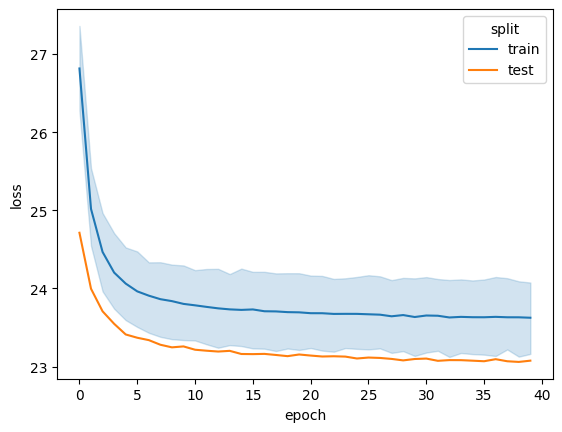

In [3]:
sns.lineplot(data=metrics, x="epoch", y="loss", hue="split") # shows the 95% confidence intervall

<Axes: xlabel='epoch', ylabel='accuracy'>

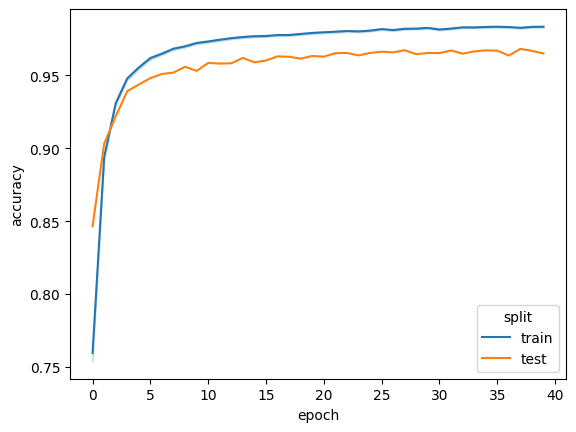

In [4]:
sns.lineplot(data=metrics, x="epoch", y="accuracy", hue="split")

<Axes: xlabel='epoch', ylabel='F1Scores'>

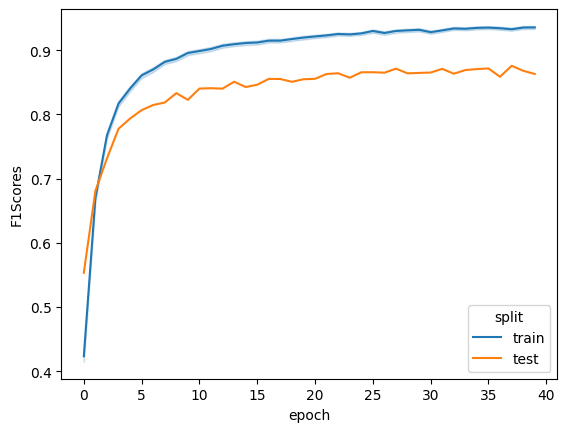

In [5]:
sns.lineplot(data=metrics, x="epoch", y="F1Scores", hue="split")

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [7]:
MODEL_PATH = r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\machine_learning\model_files\20240122-09_05_14_model_epochs_39_batch_size1_l_0.0005_loss_CrossEntropyLoss_opt_type.pt"
model = TilePredNet(n_rounds=8, n_out=53, n_sets=679, dropout=0.2)
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device(device)))
model.to(device)

TilePredNet(
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batch_norm1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
  (fc_in): Linear(in_features=5485, out_features=679, bias=True)
  (fc_hidden_1): Linear(in_features=679, out_features=1000, bias=True)
  (fc_out): Linear(in_features=1000, out_features=53, bias=True)
)

In [8]:
train_path = r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\data\training_data\train_baseline_vs_baseline_data.csv"
test_path = r"C:\Users\agent\OneDrive\UM\project_2_1\rummicubei\data\training_data\test_baseline_vs_baseline_data.csv"
train_dataset = TileDataset(annotations_file=train_path, device=device)
test_dataset = TileDataset(annotations_file=test_path, device=device)

print("Train:", len(train_dataset))
print("test", len(test_dataset))

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

Train: 4008
test 1719


In [9]:
train_preds = []
train_target = []
for X, y in train_dataloader:
    with torch.no_grad():
        train_preds.append(model(X))
        train_target.append(y)

test_preds = []
test_target = []
for X, y in test_dataloader:
    with torch.no_grad():
        test_preds.append(model(X))
        test_target.append(y)

In [15]:
get_metrics(torch.concat(train_preds), torch.concat(train_target))

{'acc': 0.9837682843208313,
 'mcc': 0.931023120880127,
 'precision': 0.9350314736366272,
 'recall': 0.9458256363868713,
 'specificity': 0.9897094964981079,
 'f1': 0.9403975605964661,
 'dice': 0.9403975605964661}

In [16]:
get_metrics(torch.concat(test_preds), torch.concat(test_target))

{'acc': 0.9664679765701294,
 'mcc': 0.8559079766273499,
 'precision': 0.8528307676315308,
 'recall': 0.8980827331542969,
 'specificity': 0.9767342209815979,
 'f1': 0.8748720288276672,
 'dice': 0.8748720288276672}